In [1]:
from collections import Counter
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
import gzip
import pickle

def evaluate(path, model):
    X, y = pickle.load(gzip.open(path, 'rb'))
    y[y != 0] -= 2
    X = X / 255.
    acc = np.mean(model(X).numpy().argmax(axis=1) == y)
    return acc

# Loading data

In [3]:
path = 'flatland_train.data'
X, y = pickle.load(gzip.open(path, 'rb'))

# data pre-proc
y[y != 0] -= 2  # labels from 0 to 4
X = X / 255.    # in range [0,1]

In [4]:
Counter(y)

Counter({2.0: 1868, 4.0: 1761, 3.0: 2137, 1.0: 2853, 0.0: 1381})

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
X_train.shape

(7500, 50, 50)

In [7]:
y_train.shape

(7500,)

# DNN 

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = (50, 50)))
model.add(keras.layers.Dense(40, activation = 'relu'))
model.add(keras.layers.Dense(20, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = 'sgd',
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2500)              0         
                                                                 
 dense (Dense)               (None, 40)                100040    
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 101,070
Trainable params: 101,070
Non-trainable params: 0
_________________________________________________________________


In [9]:
loss = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 40)

Epoch 1/40
235/235 [==============================] - 1s 4ms/step - loss: 1.6347 - accuracy: 0.3507 - val_loss: 1.4442 - val_accuracy: 0.4120
Epoch 2/40
235/235 [==============================] - 1s 3ms/step - loss: 1.3633 - accuracy: 0.4613 - val_loss: 1.3363 - val_accuracy: 0.4580
Epoch 3/40
235/235 [==============================] - 1s 3ms/step - loss: 1.2650 - accuracy: 0.4852 - val_loss: 1.3149 - val_accuracy: 0.4732
Epoch 4/40
235/235 [==============================] - 1s 4ms/step - loss: 1.2099 - accuracy: 0.4963 - val_loss: 1.2302 - val_accuracy: 0.4720
Epoch 5/40
235/235 [==============================] - 1s 3ms/step - loss: 1.1740 - accuracy: 0.5048 - val_loss: 1.1771 - val_accuracy: 0.5080
Epoch 6/40
235/235 [==============================] - 1s 4ms/step - loss: 1.1418 - accuracy: 0.5184 - val_loss: 1.1466 - val_accuracy: 0.5184
Epoch 7/40
235/235 [==============================] - 1s 6ms/step - loss: 1.1131 - accuracy: 0.5348 - val_loss: 1.1351 - val_accuracy: 0.5188
Epoch 

<AxesSubplot:>

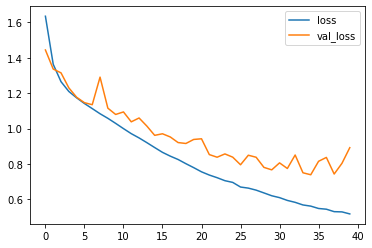

In [10]:
pd.DataFrame(loss.history)[['loss', 'val_loss']].plot()

Pakeista optimizer iš 'sgd' į keras.optimizers.SGD(learning_rate = 0.01)

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = (50, 50)))
model.add(keras.layers.Dense(40, activation = 'relu'))
model.add(keras.layers.Dense(20, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = keras.optimizers.SGD(learning_rate = 0.01),
              metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 2500)              0         
                                                                 
 dense_3 (Dense)             (None, 40)                100040    
                                                                 
 dense_4 (Dense)             (None, 20)                820       
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
Total params: 101,070
Trainable params: 101,070
Non-trainable params: 0
_________________________________________________________________


In [12]:
loss = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 40)

Epoch 1/40
235/235 [==============================] - 2s 5ms/step - loss: 1.6367 - accuracy: 0.3231 - val_loss: 1.4617 - val_accuracy: 0.4312
Epoch 2/40
235/235 [==============================] - 1s 4ms/step - loss: 1.3825 - accuracy: 0.4329 - val_loss: 1.3342 - val_accuracy: 0.4636
Epoch 3/40
235/235 [==============================] - 1s 3ms/step - loss: 1.2806 - accuracy: 0.4700 - val_loss: 1.2844 - val_accuracy: 0.4500
Epoch 4/40
235/235 [==============================] - 2s 7ms/step - loss: 1.2335 - accuracy: 0.4779 - val_loss: 1.2321 - val_accuracy: 0.4984
Epoch 5/40
235/235 [==============================] - 1s 3ms/step - loss: 1.2007 - accuracy: 0.4907 - val_loss: 1.2578 - val_accuracy: 0.4736
Epoch 6/40
235/235 [==============================] - 1s 3ms/step - loss: 1.1745 - accuracy: 0.5039 - val_loss: 1.1862 - val_accuracy: 0.5108
Epoch 7/40
235/235 [==============================] - 1s 3ms/step - loss: 1.1522 - accuracy: 0.5149 - val_loss: 1.1817 - val_accuracy: 0.4908
Epoch 

<AxesSubplot:>

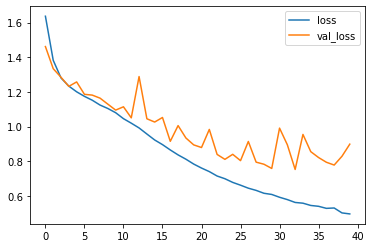

In [13]:
pd.DataFrame(loss.history)[['loss', 'val_loss']].plot()

Pakeista optimizer iš keras.optimizers.SGD(learning_rate = 0.01) į keras.optimizers.Adam(3e-4)

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = (50, 50)))
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(32, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = keras.optimizers.Adam(3e-4),
              metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 2500)              0         
                                                                 
 dense_6 (Dense)             (None, 64)                160064    
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 162,474
Trainable params: 162,474
Non-trainable params: 0
_________________________________________________________________


In [15]:
loss = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20)

Epoch 1/20
235/235 [==============================] - 3s 8ms/step - loss: 1.5058 - accuracy: 0.4048 - val_loss: 1.2870 - val_accuracy: 0.4972
Epoch 2/20
235/235 [==============================] - 1s 5ms/step - loss: 1.2101 - accuracy: 0.5003 - val_loss: 1.1560 - val_accuracy: 0.5320
Epoch 3/20
235/235 [==============================] - 1s 3ms/step - loss: 1.0961 - accuracy: 0.5501 - val_loss: 1.0878 - val_accuracy: 0.5400
Epoch 4/20
235/235 [==============================] - 1s 4ms/step - loss: 1.0053 - accuracy: 0.5944 - val_loss: 1.0314 - val_accuracy: 0.5676
Epoch 5/20
235/235 [==============================] - 1s 3ms/step - loss: 0.9303 - accuracy: 0.6257 - val_loss: 0.9480 - val_accuracy: 0.6044
Epoch 6/20
235/235 [==============================] - 1s 3ms/step - loss: 0.8602 - accuracy: 0.6597 - val_loss: 0.8862 - val_accuracy: 0.6416
Epoch 7/20
235/235 [==============================] - 1s 3ms/step - loss: 0.7985 - accuracy: 0.6843 - val_loss: 0.8466 - val_accuracy: 0.6528
Epoch 

<AxesSubplot:>

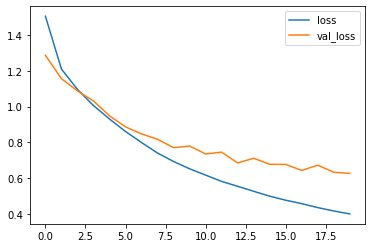

In [16]:
pd.DataFrame(loss.history)[['loss', 'val_loss']].plot()

Pridėta daugiau galios ir dropout

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = (50, 50)))
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(32, activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = keras.optimizers.Adam(3e-4),
              metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 2500)              0         
                                                                 
 dense_9 (Dense)             (None, 128)               320128    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)               

In [18]:
loss = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 30)

Epoch 1/30
235/235 [==============================] - 2s 7ms/step - loss: 1.7758 - accuracy: 0.3140 - val_loss: 1.4125 - val_accuracy: 0.4336
Epoch 2/30
235/235 [==============================] - 1s 6ms/step - loss: 1.4662 - accuracy: 0.4109 - val_loss: 1.2645 - val_accuracy: 0.4908
Epoch 3/30
235/235 [==============================] - 1s 5ms/step - loss: 1.3335 - accuracy: 0.4517 - val_loss: 1.1618 - val_accuracy: 0.5220
Epoch 4/30
235/235 [==============================] - 2s 7ms/step - loss: 1.2367 - accuracy: 0.4856 - val_loss: 1.0912 - val_accuracy: 0.5476
Epoch 5/30
235/235 [==============================] - 2s 10ms/step - loss: 1.1609 - accuracy: 0.5185 - val_loss: 1.0164 - val_accuracy: 0.5848
Epoch 6/30
235/235 [==============================] - 1s 5ms/step - loss: 1.0797 - accuracy: 0.5441 - val_loss: 0.9455 - val_accuracy: 0.6152
Epoch 7/30
235/235 [==============================] - 1s 6ms/step - loss: 1.0055 - accuracy: 0.5764 - val_loss: 0.8913 - val_accuracy: 0.6324
Epoch

<AxesSubplot:>

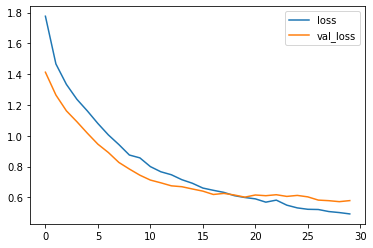

In [19]:
pd.DataFrame(loss.history)[['loss', 'val_loss']].plot()

In [20]:
model.save('model.h5')

# Test your model

In [21]:
model = keras.models.load_model('model.h5')
evaluate('flatland_train.data', model)

0.8435